In [20]:
import numpy as np
import pandas as pd
import re

In [21]:
data = pd.read_csv('laptop_price.csv', sep=',', encoding='latin-1')

In [22]:
data.columns = data.columns.str.lower()

In [23]:
data.head()

,laptop_id,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,1,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,1339.69
1,2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
2,3,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,575.00
3,4,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,2537.45
4,5,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,1803.60


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   laptop_id         1303 non-null   int64  
 1   company           1303 non-null   object 
 2   product           1303 non-null   object 
 3   typename          1303 non-null   object 
 4   inches            1303 non-null   float64
 5   screenresolution  1303 non-null   object 
 6   cpu               1303 non-null   object 
 7   ram               1303 non-null   object 
 8   memory            1303 non-null   object 
 9   gpu               1303 non-null   object 
 10  opsys             1303 non-null   object 
 11  weight            1303 non-null   object 
 12  price_euros       1303 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [25]:
data = data.drop(['laptop_id'], axis=1)

In [26]:
def calculate(string):
    numbers = re.findall(r'\d+', string)
    total = 1
    for num in numbers:
        total *= int(num)
    return total

In [27]:
data['screenresolution'] = data['screenresolution'].apply(calculate)

In [28]:
data['ram'] = data['ram'].apply(calculate)

In [29]:
data['memory'] = data['memory'].apply(calculate)

In [30]:
data['memory'] = data['memory'].apply(lambda x: x * 1000 if x < 5 else x)

In [31]:
def weight(string):
    numbers = re.findall(r'\d\.\d+', string)
    total = 1
    for num in numbers:
        total *= float(num)
    return total

In [32]:
data['weight'] = data['weight'].apply(weight)

In [33]:
data

,company,product,typename,inches,screenresolution,cpu,ram,memory,gpu,opsys,weight,price_euros
0,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 2.3GHz,8,128,Intel Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1296000,Intel Core i5 1.8GHz,8,128,Intel HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,2073600,Intel Core i5 7200U 2.5GHz,8,256,Intel HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,5184000,Intel Core i7 2.7GHz,16,512,AMD Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,4096000,Intel Core i5 3.1GHz,8,256,Intel Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,2073600,Intel Core i7 6500U 2.5GHz,4,128,Intel HD Graphics 520,Windows 10,1.80,638.00
1299,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,5760000,Intel Core i7 6500U 2.5GHz,16,512,Intel HD Graphics 520,Windows 10,1.30,1499.00
1300,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1049088,Intel Celeron Dual Core N3050 1.6GHz,2,64,Intel HD Graphics,Windows 10,1.50,229.00
1301,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1049088,Intel Core i7 6500U 2.5GHz,6,1000,AMD Radeon R5 M330,Windows 10,2.19,764.00


In [34]:
def ejection (col):
    q75 = np.percentile(data[col], 75)
    q25 = np.percentile(data[col], 25)
    iqr = q75-q25
    ejection_h = q75 + iqr * 1.5
    ejection_l = q25 - iqr * 1.5
    ejection_count = data[col][(data[col] > ejection_h) | (data[col] < ejection_l)].count()
    ejection_perc = (ejection_count / len(data)) *100
    return(ejection_h, ejection_l, ejection_count, ejection_perc)

In [35]:
ejection('price_euros')

(2821.2000000000003, -734.3200000000002, 29, 2.225633154259401)

In [36]:
good_data = data[(data['price_euros'] < ejection('price_euros')[0]) & (data['price_euros'] > ejection('price_euros')[1])]

In [37]:
good_data = good_data.reset_index(drop=True)

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

X_train, X_test, y_train, y_test = train_test_split(good_data.drop('price_euros', axis=1), good_data['price_euros'], test_size=0.3, random_state=42)

In [96]:
categorical_columns_train = X_train.select_dtypes(include=[object]).reset_index(drop=True)

In [97]:
#categorical_columns_train_gd = pd.get_dummies(categorical_columns_train, prefix = '', prefix_sep = '', dtype=int)

In [98]:
#categorical_columns_train_gd = categorical_columns_train_gd.astype('category')

In [99]:
categorical_columns_test = X_test.select_dtypes(include=[object]).reset_index(drop=True)

In [100]:
#categorical_columns_test_gd = pd.get_dummies(categorical_columns_test, prefix = '', prefix_sep = '', dtype=int)

In [101]:
#categorical_columns_test_gd = categorical_columns_test_gd.astype('category')

In [102]:
numeric_columns_train = X_train.select_dtypes(include=[int, float]).reset_index(drop=True)

In [103]:
numeric_columns_test = X_test.select_dtypes(include=[int, float]).reset_index(drop=True)

In [104]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(2)
numeric_columns_train_poly = poly.fit_transform(numeric_columns_train)
numeric_columns_test_poly = poly.fit_transform(numeric_columns_test)

In [105]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
numeric_columns_norm_train = scaler.fit_transform(numeric_columns_train_poly)
numeric_columns_norm_train = pd.DataFrame(numeric_columns_norm_train)
numeric_columns_norm_train
numeric_columns_norm_test = scaler.transform(numeric_columns_test_poly)

In [106]:
features_train = pd.concat([pd.DataFrame(numeric_columns_norm_train), categorical_columns_train], axis=1)

In [107]:
features_train.columns = features_train.columns.map(str)

In [108]:
features_test = pd.concat([pd.DataFrame(numeric_columns_norm_test), categorical_columns_test], axis=1)

In [109]:
features_test.columns = features_test.columns.map(str)

In [110]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(features_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = model.predict(features_test)

# Вычисление коэффициента детерминации (R²)
r_squared = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R²):", r_squared)

ValueError: could not convert string to float: 'Acer'

In [60]:
from sklearn.feature_selection import f_regression
f_statistics, p_value = f_regression(features_train, y_train)

In [61]:
ind_exclude = []
total = -1
for i in p_value:
    total += 1
    if float(i) > 0.05:
        ind_exclude.append(total)

In [62]:
features_train = features_train.drop(features_train.columns[ind_exclude], axis=1)

In [63]:
features_test = features_test.drop(features_test.columns[ind_exclude], axis=1)

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(features_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = model.predict(features_test)

# Вычисление коэффициента детерминации (R²)
r_squared = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R²):", r_squared)

Коэффициент детерминации (R²): -8.858809048808157e+23


In [65]:
f_statistics, p_value = f_regression(features_train, y_train)

In [66]:
ind_exclude = []
total = -1
for i in p_value:
    total += 1
    if float(i) > 0.05:
        ind_exclude.append(total)

In [67]:
import prince

In [111]:
num_train = pd.DataFrame(numeric_columns_norm_train)
pca_train = prince.PCA(
     n_components=6,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=42
 )
pca_train = pca_train.fit(num_train)

In [112]:
pca_train_plot = pca_train.eigenvalues_summary
pca_train_plot

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,6.743,33.72%,33.72%
1,5.381,26.91%,60.62%
2,4.669,23.35%,83.97%
3,2.033,10.17%,94.14%
4,0.614,3.07%,97.21%
5,0.223,1.11%,98.32%


<Axes: xlabel='component'>

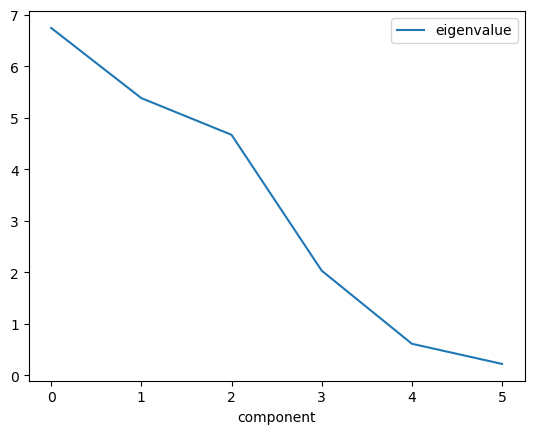

In [113]:
pca_train_plot.reset_index().iloc[:,0:2].astype('float').plot('component', 'eigenvalue')

In [114]:
pca_train_num = pca_train.transform(num_train) # same as calling ca.fs_r_sup(df_new) for *another* test set.
pca_train_num.columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6']

In [115]:
num_test = pd.DataFrame(numeric_columns_norm_test)
pca_test = prince.MCA(
     n_components=6,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=42
 )
pca_test = pca_test.fit(num_test)
pca_test_num = pca_test.transform(num_test) # same as calling ca.fs_r_sup(df_new) for *another* test set.
pca_test_num.columns = ['pca_1', 'pca_2', 'pca_3', 'pca_4', 'pca_5', 'pca_6']

In [120]:
mca_train = prince.MCA(
     n_components=60,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=42
 )
mca_train = mca_train.fit(categorical_columns_train)

In [121]:
mca_train_plot = mca_train.eigenvalues_summary
mca_train_plot

,eigenvalue,% of variance,% of variance (cumulative)
component,,,
0,0.825,0.72%,0.72%
1,0.708,0.61%,1.33%
2,0.634,0.55%,1.88%
3,0.578,0.50%,2.38%
4,0.563,0.49%,2.87%
5,0.547,0.47%,3.35%
6,0.544,0.47%,3.82%
7,0.533,0.46%,4.28%
8,0.526,0.46%,4.74%


<Axes: xlabel='component'>

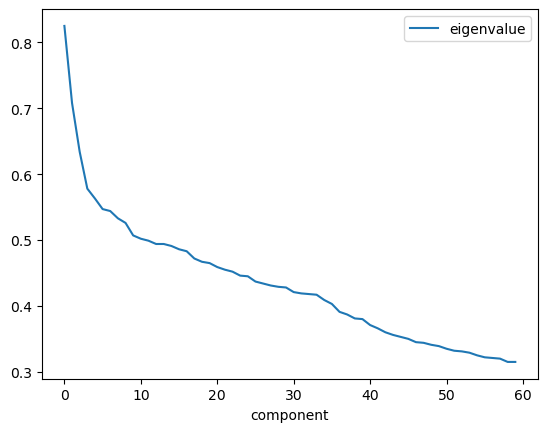

In [122]:
mca_train_plot.reset_index().iloc[:,0:2].astype('float').plot('component', 'eigenvalue')

In [126]:
mca_train = mca_train.transform(categorical_columns_train)

In [131]:
mca_test = prince.MCA(
     n_components=60,
     n_iter=3,
     copy=True,
     check_input=True,
     engine='sklearn',
     random_state=42
 )
mca_test = mca_test.fit(categorical_columns_test)

In [132]:
mca_test = mca_test.transform(categorical_columns_test)

In [137]:
f_train = pd.concat([pca_train_num, mca_train], axis=1)
f_train.columns = f_train.columns.map(str)
f_test = pd.concat([pca_test_num, mca_test], axis=1)
f_test.columns = f_test.columns.map(str)

In [138]:
model = LinearRegression()
model.fit(f_train, y_train)

# Прогнозирование на тестовом наборе
y_pred = model.predict(f_test)

# Вычисление коэффициента детерминации (R²)
r_squared = r2_score(y_test, y_pred)
print("Коэффициент детерминации (R²):", r_squared)

Коэффициент детерминации (R²): -0.0907511111145487
